# Udacity Data Analyst Nanodegree

# P2: Investigate the Titanic dataset

Date: 10.11.2017<br>
Author: Diogo Adão e Silva

## Context
This notebook is my project 'Investigate a dataset' submission. Delivering this project is one of the requirements of Udacity's [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002). By successfully completing this project, Udacity students demonstrate they know how to go through the entire data analysis process.

## Structure
To start, a quick background on the Titanic is given. Next, the goal of the project is set, followed by the exploratory data analysis necessary to achieve the goal. Finally some conclusions are drawn others supported by hypothesis testing.

## Background

The sinking of the RMS Titanic in April 1912 is one of the most well-known shipwrecks in history. **The Titanic sailed with 2,208 passengers and crew** on April 1912 from Southampton, England. Four days later she collided with an iceberg and sank, leading to the **death of 1496 people**. The Titanic continues to fascinate people up to our day, there is extensive information related to the shipwreck online (eg. [here](https://www.encyclopedia-titanica.org)) and there is even a full-sized replica currently under construction in China.

![alt text](https://raw.githubusercontent.com/DiogoAdaoeSilva/DAND/master/p2/Titanic-departing-1912.jpg "Titanic departing 1912")

*<center>Titanic departing in 1912 - Source: oldpicsarchive.com</center>*

# Question Phase

The goal of the project is to:

1. Determine which factors made Titanic passengers more likely to survive.
2. Provide an overview of the demographics of the Titanic passengers in the dataset
3. Draw conclusions about the relationships between passenger sex, class and the likelyhood of surviving a shipwreck

The following variables are analyzed:
    - Class
    - Sex
    - Age
    - Embark location
    - Travelling with a relative (sibling, spouse, parent or children)
    - Fare
    - Passengers with the same ticket

# Wrangling Phase

## Dataset Aquisition

The curated dataset for the project contains demographics from 891 passengers and crew on board the RMS Titanic. It was downloaded from Udacity, which obtained it on [Kaggle](https://www.kaggle.com/c/titanic/data), where the full dataset and a more detailed description can be found.

The Titanic dataset is very popular and suited for those getting started with data science and machine learning. Just at Kaggle, over 9,000 teams have participated in the Titanic competition.

In [1]:
# upload the csv
import pandas as pd
titanic_df = pd.read_csv('titanic-data.csv')

In [2]:
# preview dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dimensions of dataframe
titanic_df.shape

(891, 12)

In [124]:
# get descriptive statistics

def background_lower_count(val):
    """
    highlight values in columns that do not have records for all passengers
    """
    return 'background-color: yellow' if val < len(titanic_df) else ''

def zeroes(val):
    """
    highlight values that are equal to zero
    """
    return 'background-color: yellow' if val == 0 else ''

titanic_df.describe(include='all').style.\
                                    applymap(background_lower_count, subset=pd.IndexSlice['count',]).\
                                    applymap(zeroes, subset='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714,891,891,891,891,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Johanson, Mr. Jakob Alfred",male,nan,nan,nan,CA. 2343,nan,B96 B98,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446,0.383838,2.30864,nan,nan,29.6991,0.523008,0.381594,nan,32.2042,nan,nan
std,257.354,0.486592,0.836071,nan,nan,14.5265,1.10274,0.806057,nan,49.6934,nan,nan
min,1,0,1,nan,nan,0.42,0,0,nan,0,nan,nan
25%,223.5,0,2,nan,nan,20.125,0,0,nan,7.9104,nan,nan
50%,446,0,3,nan,nan,28,0,0,nan,14.4542,nan,nan
75%,668.5,1,3,nan,nan,38,1,0,nan,31,nan,nan


By viewing the first row in the above table, *'count'*, it is evident that the columns 'Age', 'Cabin' and 'Embarked' do not have records for the all the passengers. It is also worth noticing that the *'Fare'* column has a value of 0.00 in the *'min'* row. This indicates that before analysing these columns it is a good idea to clean the data.

## Data Cleaning

In [4]:
# get a dataframe where all passengers have age record
dropna_age_df = titanic_df.dropna(axis=0, how='any', subset= ['Age'])

# get a dataframe that excludes passengers with fare=0
dropnull_fares_df = titanic_df[titanic_df['Fare']!=0.0]

# Explore Phase

## 1. Which factors made passengers more likely to survive?

For most of the analyses, a stacked bar chart showing the survival rate for different passenger groups is shown. This way the reader can view a chart and quickly see in which group there was a higher percentage of passengers surviving.

### *Class*

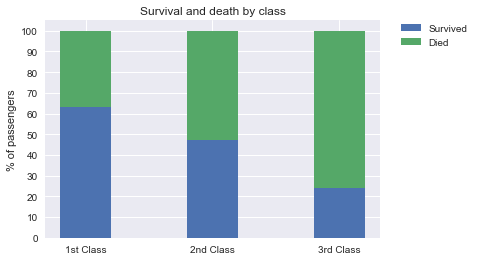

In [24]:
# import the libraries needed to create the charts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# view survival and death rate for passenger class (1st, 2nd and 3rd)
survival_by_class = 100 * (titanic_df.groupby('Pclass')['Survived'].mean())
died_by_class = (100 - survival_by_class)


N = len(survival_by_class)
ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars

p1 = plt.bar(ind, survival_by_class, width, label='Survived')
p2 = plt.bar(ind, died_by_class, width, bottom=survival_by_class, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival and death by class')
plt.xticks(ind, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 110, 10))

# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The chart above shows a strong contrast between the survival rate in different passenger classes. The survival rates in the 1st, 2nd and 3rd class were approximately 63%, 47% and 24%, respectively.

### *Sex*

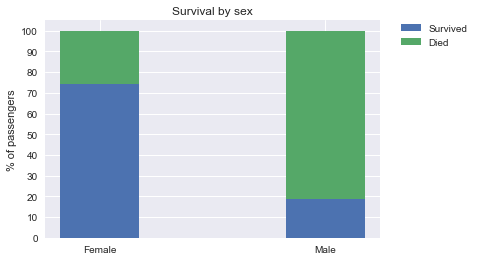

In [6]:
# view survival and death rate for passengers grouped by sex

survival_by_sex = 100 * (titanic_df.groupby('Sex')['Survived'].mean())
died_by_sex = (100 - survival_by_sex)


N = len(survival_by_sex)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, survival_by_sex, width, label='Survived')
p2 = plt.bar(ind, died_by_sex, width,
             bottom=survival_by_sex, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival by sex')
plt.xticks(ind, ('Female', 'Male'))
plt.yticks(np.arange(0, 110, 10))
# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The suvival rate for male and female passengers is approximately 74% and 19% respectively.

### *Age*

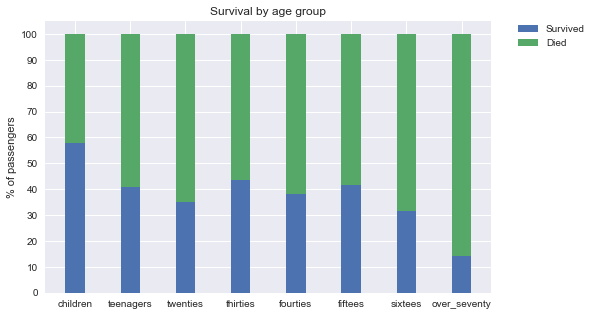

In [47]:
# get survival and death rate for an age interval
def age_group(age_start,age_end=120):
    survival_age = 100 * (dropna_age_df[(dropna_age_df['Age']>=age_start) \
                                    & (dropna_age_df['Age']<age_end)]['Survived'].mean())
    die_age = 100 - survival_age
    return survival_age, die_age

# get survival and death rate for ages groups I am interested in
age_groups = {
'children': age_group(0,13),
'teenagers': age_group(13,20),
'twenties': age_group(20,30),
'thirties': age_group(30,40),
'fourties': age_group(40,50),
'fiftees': age_group(50,60),
'sixtees': age_group(60,70),
'over_seventy': age_group(70)
}
 
# get the list of scalars (height of the bars in the chart)
survival_by_age = []
die_by_age = []
for key, value in age_groups.items():
    survival_by_age.append(value[0])
    die_by_age.append(value[1])

# turn the lists into numpy arrays in order to use them for the bar chart    
survival_by_age = np.array(survival_by_age)
died_by_age = np.array(die_by_age)

# increase figure size to avoid x-tick labels overlapping
plt.figure(figsize=(8,5))

# plot the stacked bar chart         
N = len(survival_by_age)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, survival_by_age, width, label='Survived')
p2 = plt.bar(ind, died_by_age, width,
             bottom=survival_by_age, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival by age group')
plt.xticks(ind, ('children', 'teenagers', 'twenties', 'thirties', 'fourties', \
                 'fiftees', 'sixtees', 'over_seventy'))
plt.yticks(np.arange(0, 110, 10))

# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The chart shows that the survival rate for the children (less than thirteen years old) group is close to 60%. For the other age groups the survival rate is between 30 to 45%, except for the over-seventy-years old group, where less than 20% of the passengers survived.

### *Embark location*

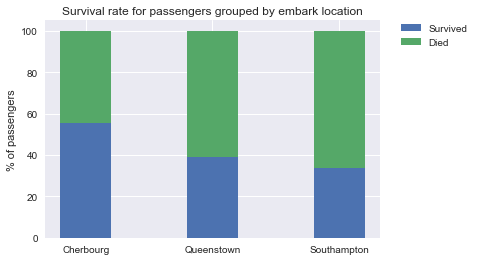

In [48]:
# view survival and death rate for passengers grouped by embark location
survival_by_embark = 100 * (titanic_df.groupby('Embarked')['Survived'].mean())
died_by_embark = (100 - survival_by_embark)


N = len(survival_by_embark)
ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars

p1 = plt.bar(ind, survival_by_embark, width, label='Survived')
p2 = plt.bar(ind, died_by_embark, width, bottom=survival_by_embark, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival rate for passengers grouped by embark location')
plt.xticks(ind, ('Cherbourg', 'Queenstown', 'Southampton'))
plt.yticks(np.arange(0, 110, 20))

# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There is a visible difference between the survival rate of passengers who embarked in Cherbourg and Southampton.

### *Travelling with a sibling, spouse, parent or child*

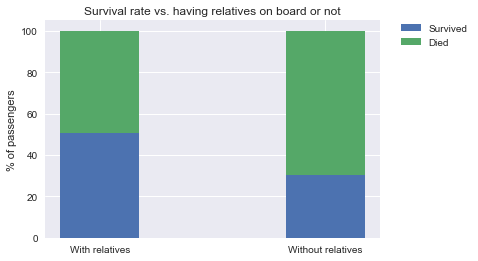

In [51]:
# create a list with the survival rate of each group (travelling with or without relatives)
survival_relative = []
survival_with_relative = 100 * titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0)]['Survived'].mean()
survival_without_relative = 100 * titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)]['Survived'].mean()
survival_relative.append(survival_with_relative)
survival_relative.append(survival_without_relative)
survival_relative = np.array(survival_relative) # create the array necessary for the bar chart

# create a list with the death rate of each group (travelling with or without relatives)
died_relative = []
died_with_relative = 100 - survival_with_relative
died_without_relative = 100 - survival_without_relative
died_relative.append(died_with_relative)
died_relative.append(died_without_relative)
died_relative = np.array(died_relative) # create the array necessary for the bar chart


# plot survival and death rate for passengers grouped by whether they travelled with a relative or not
N = len(survival_relative)
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, survival_relative, width, label='Survived')
p2 = plt.bar(ind, died_relative, width, bottom=survival_relative, label='Died')

plt.ylabel('% of passengers')
plt.title('Survival rate vs. having relatives on board or not')
plt.xticks(ind, ('With relatives', 'Without relatives'))
plt.yticks(np.arange(0, 110, 20))
# place legend to the right of the plot to avoid overlap with bar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Passengers who travelled with relatives on board survived at a higher rate (appr. 50%) than passengers travelling without relatives (appr. 30%)

### *Fare*

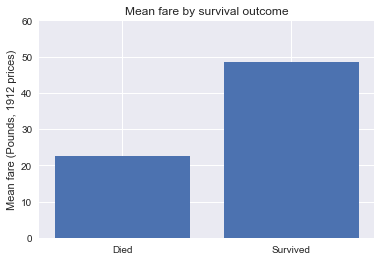

In [10]:
# visualize the mean fare for passengers who survived vs those who died 
mean_fare_survived = dropnull_fares_df.groupby(['Survived']).mean()['Fare']

fig, ax = plt.subplots()
ind = np.arange(2)

ax.bar(ind, mean_fare_survived)
plt.xticks(ind, ('Died', 'Survived'))
ax.set_ylabel('Mean fare (Pounds, 1912 prices)')
ax.set_yticks(np.arange(0, 62, 10))
ax.set_title('Mean fare by survival outcome')

The average price paid by passengers who survived (48.54) is more than double than the average price paid by passengers who did not survive (22.70). This fits well with the previous analysis of survival and passenger class, where it was seen that first class passengers had a higher survival rate than third class passengers. Naturally, ticket fares in the first class are higher than in the second and third classes.

### *Grouping by age and sex*

Of the previous analyses, passenger class and sex seemed to be the factors that more strongly influence the survival outcome. The chart below shows survival rates for passengers grouped by class and sex. The chart shows that sex has a larger effect size on survival than passenger class. While around 50% of women in the third-class survived, less than 40% of the first-class male passengers survived.

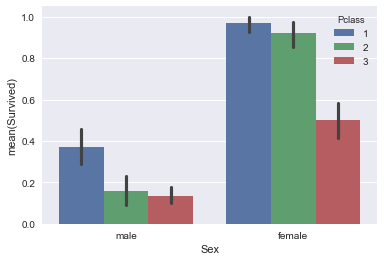

In [12]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

## 2. Overview of the demographics of the Titanic passengers

### *How many men and women in the dataset*

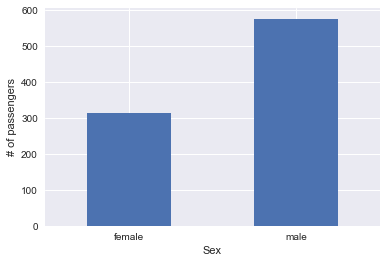

In [13]:
sex_distribution = titanic_df.groupby('Sex').count()['PassengerId']
sex_distribution.plot.bar(rot=0, ).set_ylabel('# of passengers')

Our dataset has approximately 65% male passengers and 35% female

### *Passengers by class and sex*

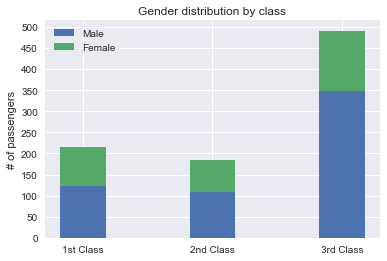

In [14]:
gender_class_count = titanic_df.groupby(['Sex', 'Pclass'], as_index=False).count()
N = 3
male_data = gender_class_count[gender_class_count['Sex']=='male']['PassengerId']
female_data = gender_class_count[gender_class_count['Sex']=='female']['PassengerId']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, male_data, width)
p2 = plt.bar(ind, female_data, width,
             bottom=male_data)

plt.ylabel('# of passengers')
plt.title('Gender distribution by class')
plt.xticks(ind, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 520, 50))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

The chart above shows how the third class passengers were the majority. In all passenger classes there were more men than women.

### *Passengers age distribution by class*

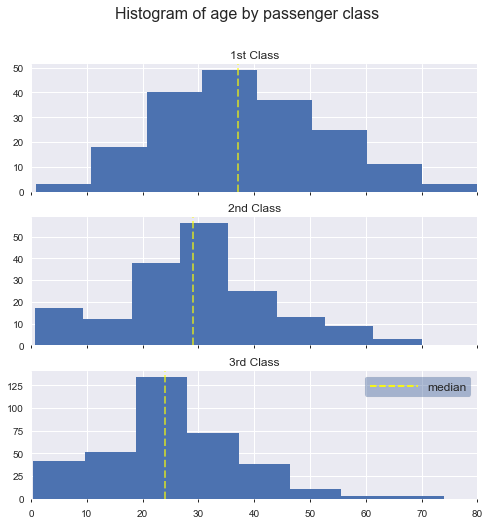

In [15]:
# make a histogram of age for each passenger class

# Get passenger data for each class
first_class_data = dropna_age_df[dropna_age_df['Pclass'] == 1]
second_class_data = dropna_age_df[dropna_age_df['Pclass'] == 2]
third_class_data = dropna_age_df[dropna_age_df['Pclass'] == 3]

# create 3 subplots
f, axarr = plt.subplots(3, sharex=True, figsize=(8,8))
plt.suptitle('Histogram of age by passenger class', fontsize=16)

# histogram of age for first class
axarr[0].hist(first_class_data['Age'], bins=8)
axarr[0].set_title('1st Class')
axarr[0].minorticks_on()
axarr[0].tick_params('x',length=3, which='major')

# histogram of age for second class
axarr[1].hist(second_class_data['Age'], bins=8)
axarr[1].set_title('2nd Class')
axarr[1].minorticks_on()
axarr[1].tick_params('x',length=3, which='major')

# histogram of age for third class
axarr[2].hist(third_class_data['Age'], bins=8)
axarr[2].set_title('3rd Class')
axarr[2].minorticks_on()
axarr[2].tick_params('x',length=3, which='major')
axarr[2].set_xlim(0,80) # to remove the space that existed on the left of the 0 value in the x axis

# locate the median of each distribution
axarr[0].axvline(first_class_data['Age'].median(), color='yellow', linewidth=2, linestyle='dashed', alpha=0.6)
axarr[1].axvline(second_class_data['Age'].median(), color='yellow', linewidth=2, linestyle='dashed', alpha=0.6)
axarr[2].axvline(third_class_data['Age'].median(), color='yellow', linewidth=2, linestyle='dashed', alpha=0.6)

# add legend for median
import matplotlib.lines as mlines
median_line = mlines.Line2D([], [], color='yellow',
                         label='median', linestyle='dashed')
plt.legend(handles=[median_line], frameon=True, facecolor='#3c5e96', fontsize=12, handlelength=4, framealpha=0.4)

The oldest passenger in our dataset was 80 years old. Interesting to not that the median and average age decrease as we go from the first to the third class. This is understandable, if we assume that younger people tend to have less purchasing power or less need to travel in luxury.

### *Embark Locations*

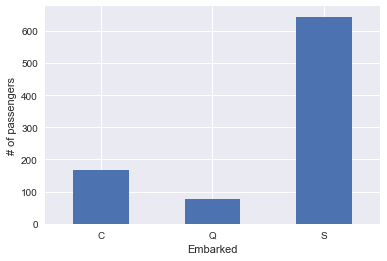

In [59]:
embark_locations = titanic_df.groupby('Embarked').count()['PassengerId']
embark_locations.plot.bar(rot=0).set_ylabel('# of passengers')

The majority of passengers embarked in Southampton, followed by Cherbourg and then Queenstown.

### *Fare distribution by class*

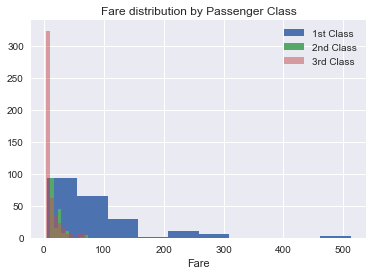

In [17]:
dropnull_fares_df[dropnull_fares_df['Pclass'] == 1]['Fare'].hist(label='1st Class')
dropnull_fares_df[dropnull_fares_df['Pclass'] == 2]['Fare'].hist(label='2nd Class')
dropnull_fares_df[dropnull_fares_df['Pclass'] == 3]['Fare'].hist(label='3rd Class',alpha=0.5)
plt.legend()
plt.xlabel('Fare')
plt.title('Fare distribution by Passenger Class')

Some passengers were able to travel first class without paying a high price relative to second or third class. Therefore there were 3rd class passengers that paid a higher fare than some first class passengers. The highest fare value is 512. [Here is a Time article](http://time.com/money/4283738/titanic-most-expensive-ticket/) on what kind of luxury such a ticket would have bought on the Titanic.

### *Tickets*

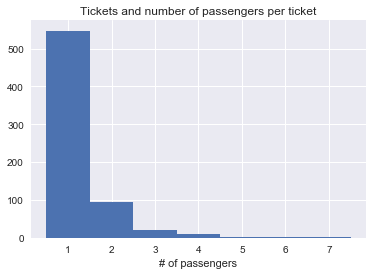

In [18]:
# Distribution of number of passengers per ticket
passengers_per_ticket = titanic_df.groupby('Ticket')['PassengerId'].count()
passengers_per_ticket.hist(bins=range(1,9), align='left')
plt.xlabel('# of passengers')
plt.title('Tickets and number of passengers per ticket')

In [19]:
shared_tickets = passengers_per_ticket > 1
'{number} tickets are "group" tickets'.format(number=np.sum(shared_tickets))

'134 tickets are "group" tickets'

## 3. Hypothesis Testing

The population is set to be all shipwrecks, past and future. The Titanic dataset is assumed to be a sample of this fictitious population and therefore can be used to accept or reject hypotheses.

#### Question: Is a passenger's probability of survival independent of sex?

H<sub>0</sub>: Sex and survival are independent<br>
H<sub>A</sub>: Sex and survival are not independent

where H<sub>0</sub> is the null hypothesis and H<sub>A</sub> is the alternative hypothesis.

The significance level is 0.05. For this scenario a Chi-square test of independence is appropriate because:
  - both variables (survival and gender) are categorical
  - observations are independent (a passengers is either a woman or a man and either survives or dies)
  - the expected frequency count for each cell of the contingency table is larger than 5

In [20]:
print('The contingency table without marginal totals:')
survived_sex = pd.crosstab(index=titanic_df['Survived'], columns=titanic_df['Sex'])
survived_sex

The contingency table without marginal totals:


Sex,female,male
Survived,,
0,81,468
1,233,109


In [21]:
from scipy import stats

# return in the following order: the test statistic, p-value of the test, degrees of freedom, expected frequencies
stats.chi2_contingency(survived_sex)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

The chi-square value reported, $\chi^2$ = 260.72, is the Yates chi-square, corrected for continuity. Its p-value is < 0.05 and therefore we reject the null hypothesis and conclude that women are more likely to survive a shipwreck.

#### Question: Is a passenger's probability of survival independent of class?

H<sub>0</sub>: Class and survival are independent<br>
H<sub>A</sub>: Class and survival are not independent
    
The conditions are the same as in the previous test and therefore a Chi-square test of independence is appropriate.

In [22]:
print('The contingency table without marginal totals:')
survived_class = pd.crosstab(index=titanic_df['Survived'], columns=titanic_df['Pclass'])
survived_class

The contingency table without marginal totals:


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
# return in the following order: the test statistic, p-value of the test, degrees of freedom, expected frequencies
stats.chi2_contingency(survived_class)

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

Since the p-value of the test-statistic is lower than the significance value (0.05) 
we reject the null hypothesis and conclude that passengers in first class are more likely to survive than passengers in the second and third classes.